In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Las losowy

W przypadku lasu losowego, trenowałem modele dla wielu różnych przypadków, dlatego wyekstrahowałem kod do osobnej funkcji.
Wersje które przetestowałem:

1. Wariant domyślny - bez określenia parametru `max_depth` nie ma możliwości otrzymania sensownych wyników w przypadku danych testowych,
2. Wariant z maksymalną głębokością równą `5` oraz liczbą drzew `100`, `200` oraz `400`,
3. Wariant z maksymalną głębokością równą `4` oraz liczbą drzew `100`, `200` oraz `400`,
4. Wariant z maksymalną głębokością równą `3` oraz liczbą drzew `100`.

Najlepsze wyniki uzyskane zostały w przypadku **głębokości `4` oraz liczby drzew równej `100` oraz `200`**.

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
def random_forest_summary(X_train, X_test, y_train, y_test, 
                          n_jobs=6, max_depth=None, n_estimators=100):
    # trenowanie modelu
    random_forest = RandomForestRegressor(verbose=1, n_jobs=n_jobs, max_depth=max_depth, n_estimators=n_estimators)
    random_forest.fit(X_train, y_train)
    
    # podsumowanie wynikow
    y_pred_default = random_forest.predict(X_test)
    print(f'mean_squared_error: {mean_squared_error(y_test, y_pred_default)}')
    print(f'train score: {random_forest.score(X_train, y_train)}')
    print(f'test score: {random_forest.score(X_test, y_test)}')
    
    # wizualizacja
    pred_default = random_forest.predict(X_test).astype(int)
    temp_default = y_test.values > 0
    plt.scatter(y_test.values[temp_default], pred_default[temp_default], marker=".")
    plt.xlabel("original", fontsize=12)
    plt.ylabel("predictions", fontsize=12)
    plt.show()

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  5.4min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


mean_squared_error: 317.42477639606267


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


train score: 0.6560160955094998


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: -0.19148503813619253


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


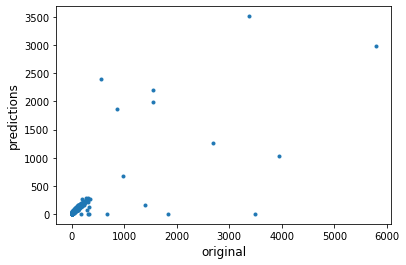

In [5]:
random_forest_summary(X_train, X_test, y_train, y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


mean_squared_error: 186.8257857134679


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.0s finished


train score: 0.6354581213641701


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.2987310853835524


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


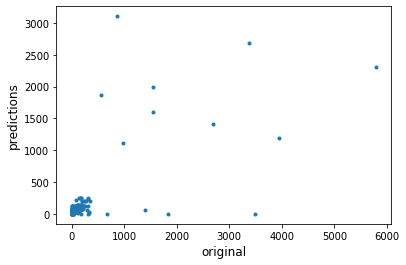

In [6]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=5)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  7.5min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.1s finished


mean_squared_error: 187.64567954333447


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    5.0s finished


train score: 0.6289320189257412


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.2s finished


test score: 0.29565353346010914


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.2s finished


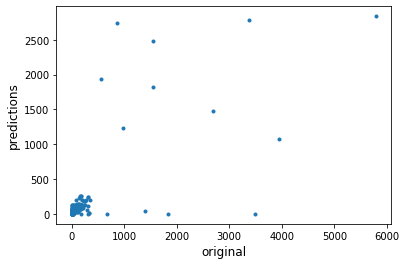

In [7]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=5, n_estimators=200)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed: 15.1min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.1s finished


mean_squared_error: 199.79816679140305


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    8.5s finished


train score: 0.6347380534078761


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.25003798039393044


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.1s finished


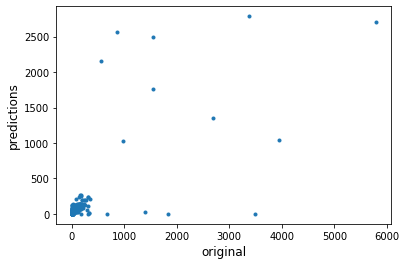

In [8]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=5, n_estimators=400)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


mean_squared_error: 124.72551935913691


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.1s finished


train score: 0.5377422459539922


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.5318305272908086


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.4s finished


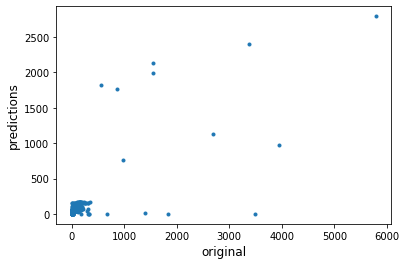

In [9]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=4)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  5.9min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.9s finished


mean_squared_error: 127.36852821204768


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    4.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


train score: 0.5515172881436279


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.0s finished


test score: 0.5219097342775517


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.0s finished


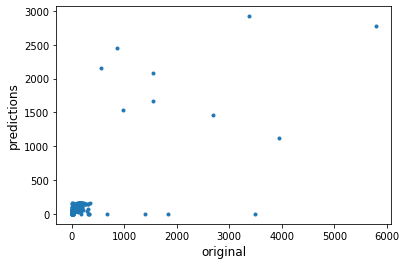

In [10]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=4, n_estimators=200)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed: 12.8min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.7s finished


mean_squared_error: 127.74417364274343


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:   11.3s finished


train score: 0.5427100569445038


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.5204997123019521


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    3.2s finished


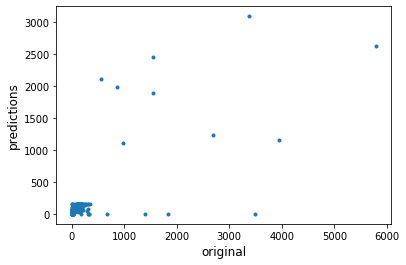

In [11]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=4, n_estimators=400)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.6s finished


mean_squared_error: 127.94469072250827


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


train score: 0.4061095110788566


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.5197470517719737


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


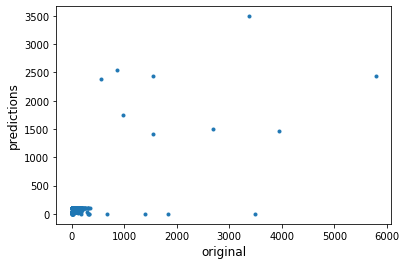

In [12]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=3)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  5.6min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.2s finished


mean_squared_error: 128.89602680258565


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    5.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


train score: 0.40955383283445623


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.5161761184676465


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    1.0s finished


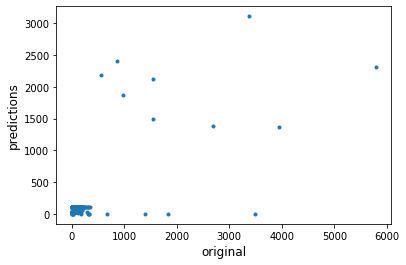

In [13]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=3, n_estimators=200)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed: 11.0min finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.2s finished


mean_squared_error: 128.5711955907574


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    9.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


train score: 0.4041440711154304


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


test score: 0.5173954042877618


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed:    2.3s finished


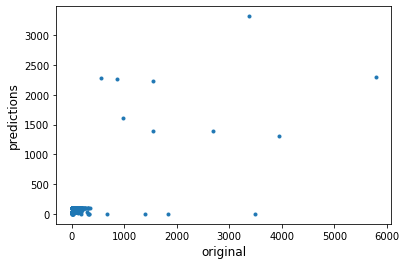

In [14]:
random_forest_summary(X_train, X_test, y_train, y_test, max_depth=3, n_estimators=400)

# Wizualizacja wyników

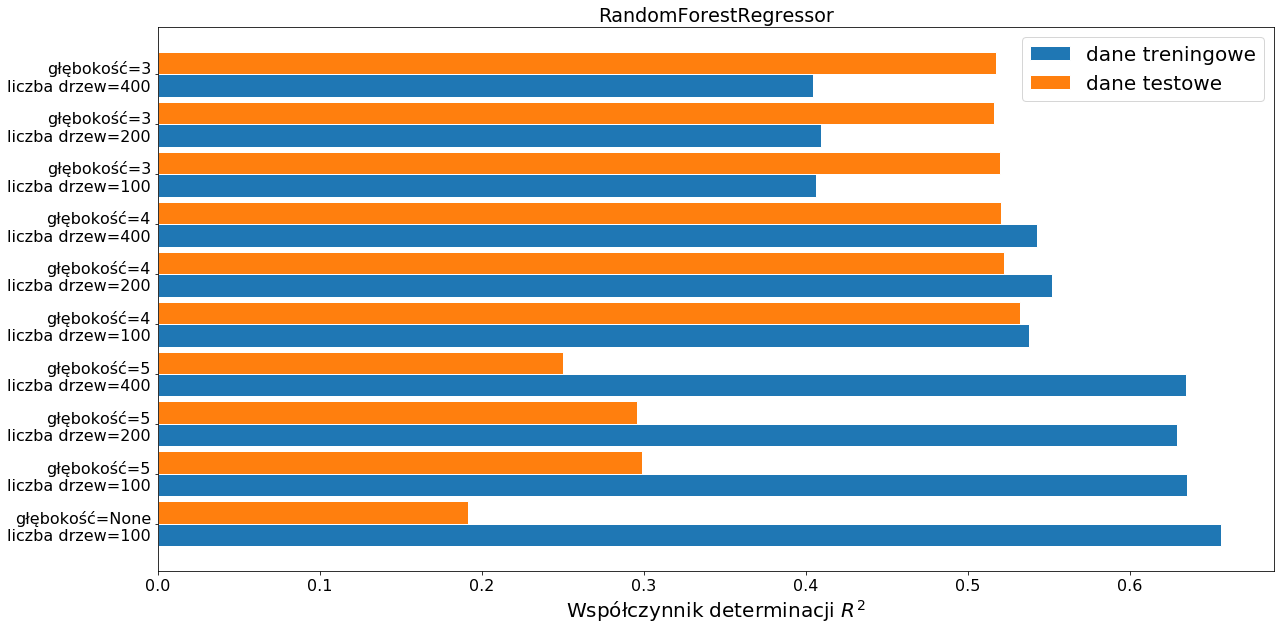

In [15]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 16})
labels = ['głębokość=None\nliczba drzew=100',
          'głębokość=5\nliczba drzew=100', 'głębokość=5\nliczba drzew=200', 'głębokość=5\nliczba drzew=400',
          'głębokość=4\nliczba drzew=100', 'głębokość=4\nliczba drzew=200', 'głębokość=4\nliczba drzew=400',
          'głębokość=3\nliczba drzew=100', 'głębokość=3\nliczba drzew=200', 'głębokość=3\nliczba drzew=400']
train_scores = [0.6560160955094998,
                0.6354581213641701, 0.6289320189257412, 0.6347380534078761,
                0.5377422459539922, 0.5515172881436279, 0.5427100569445038,
                0.4061095110788566, 0.40955383283445623, 0.4041440711154304]
test_scores = [0.19148503813619253, 
               0.2987310853835524, 0.29565353346010914, 0.25003798039393044,
               0.5318305272908086, 0.5219097342775517, 0.5204997123019521,
               0.5197470517719737, 0.5161761184676465, 0.5173954042877618]
barDim = 0.45

r1 = np.arange(len(labels))
r2 = [x + barDim for x in r1]
plt.barh(r1, train_scores, height=barDim, edgecolor='white', label='dane treningowe')
plt.barh(r2, test_scores, height=barDim, edgecolor='white', label='dane testowe')

plt.xlabel('Współczynnik determinacji $R^2$', fontsize=20)
plt.yticks([r +  barDim/2 for r in range(len(labels))], labels)

plt.title('RandomForestRegressor')
plt.legend(fontsize=20)
plt.show()